In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
import datetime

from sklearn import preprocessing

In [113]:
# load data
df = pd.read_csv("BreastCancer.csv")
 
print (df.head)

<bound method NDFrame.head of      radius_mean  diagnosis  texture_mean  perimeter_mean  area_mean  \
0          17.99  Malignant         10.38          122.80     1001.0   
1          20.57  Malignant         17.77          132.90     1326.0   
2          19.69  Malignant         21.25          130.00     1203.0   
3          11.42  Malignant         20.38           77.58      386.1   
4          20.29  Malignant         14.34          135.10     1297.0   
..           ...        ...           ...             ...        ...   
564        21.56  Malignant         22.39          142.00     1479.0   
565        20.13  Malignant         28.25          131.20     1261.0   
566        16.60  Malignant         28.08          108.30      858.1   
567        20.60  Malignant         29.33          140.10     1265.0   
568         7.76     Benign         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840      

In [114]:
# look at data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   diagnosis                569 non-null    object 
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [115]:
# visualize the data
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [116]:
df.columns

Index(['radius_mean', 'diagnosis', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

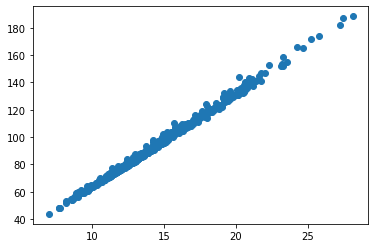

In [117]:
# visualize the data
plt.scatter(x=df["radius_mean"],y=df["perimeter_mean"])

<AxesSubplot:>

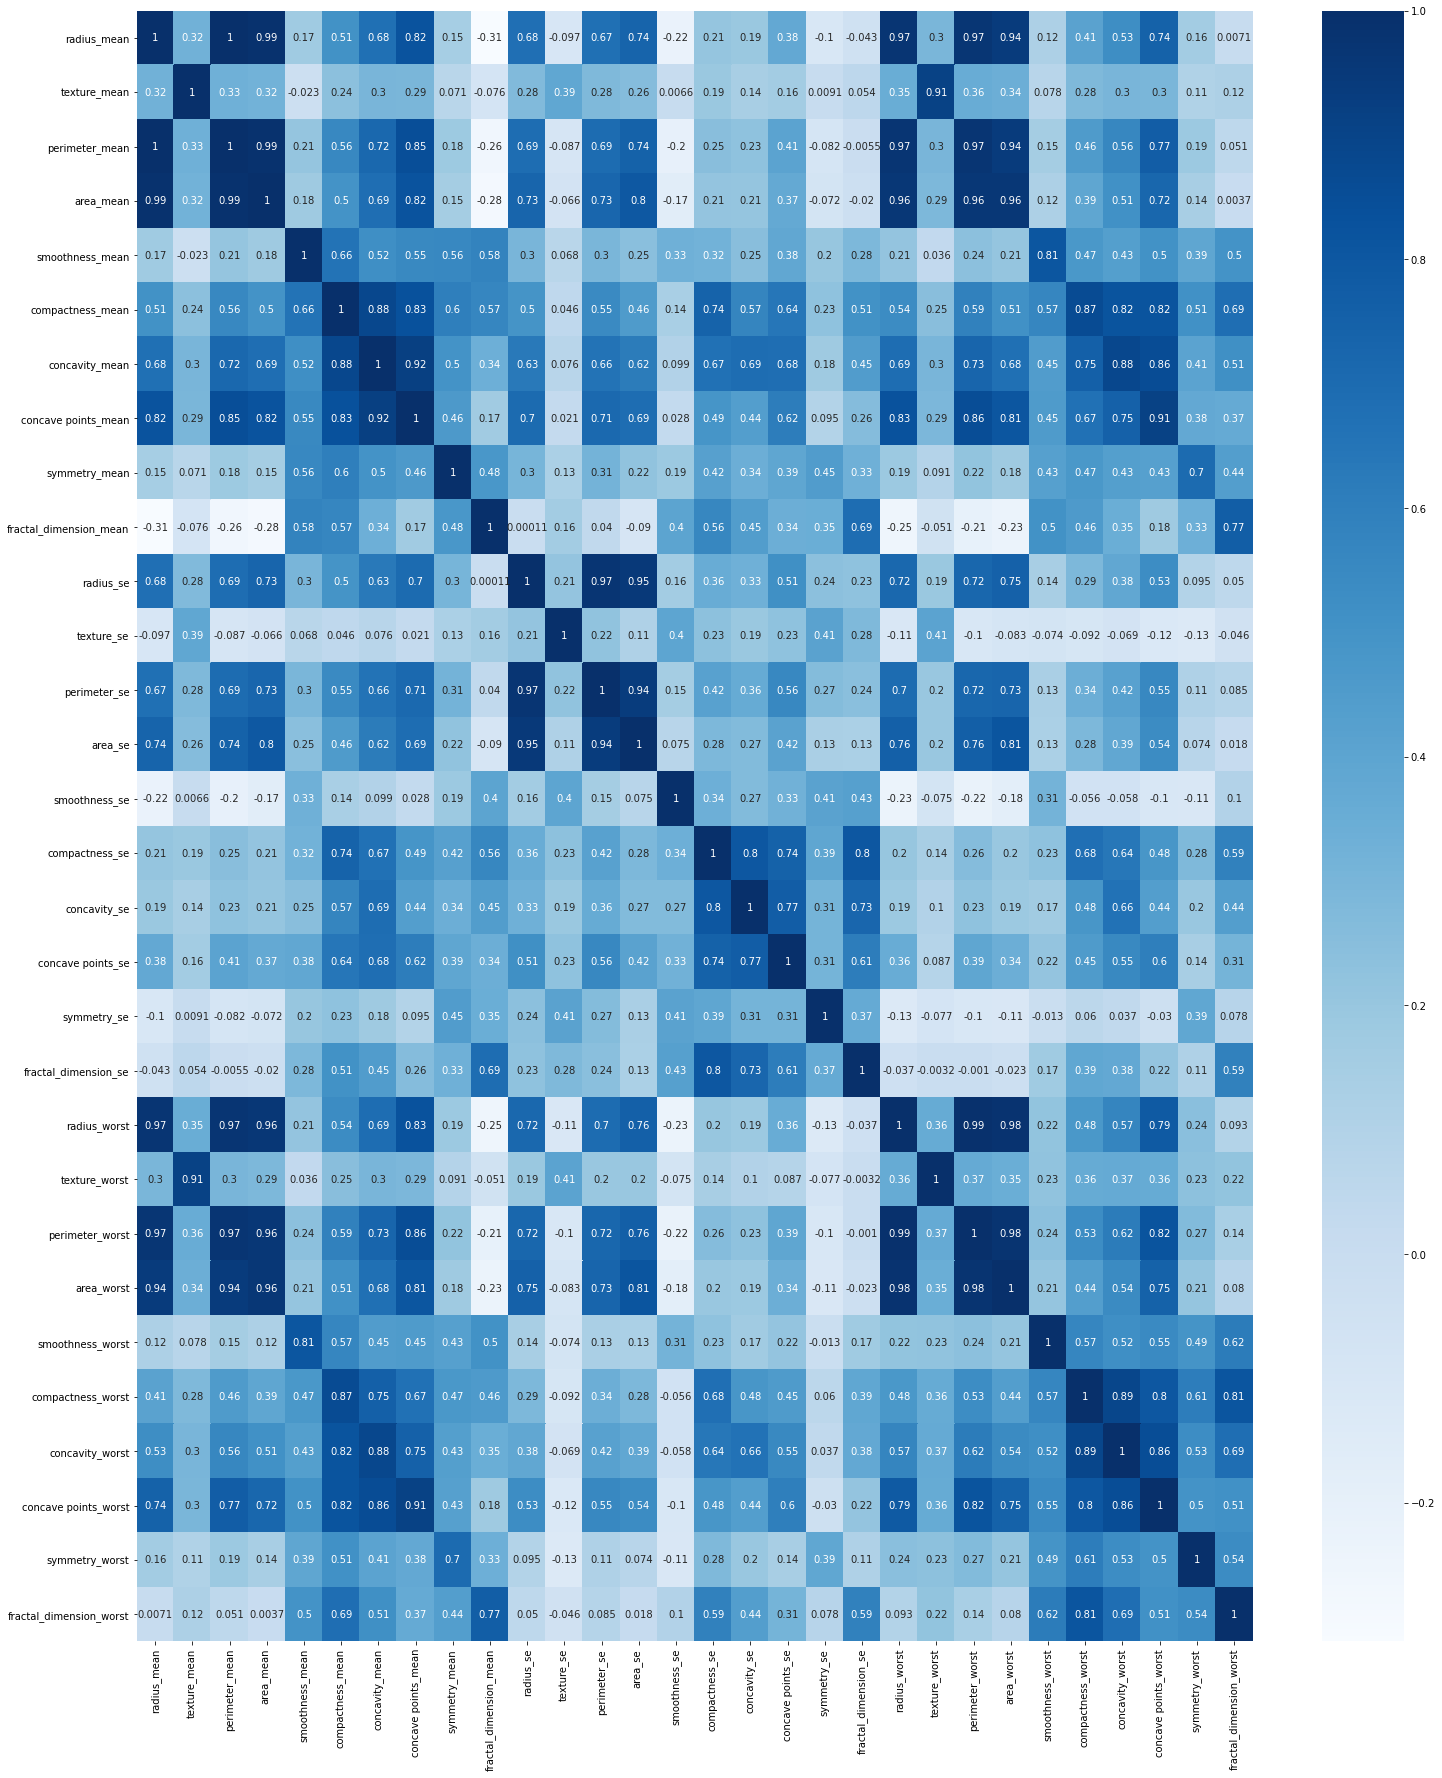

In [118]:
plt.figure(figsize=(25,30)) 

sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [119]:
# preprocessing
df.diagnosis.replace({"M":1,"B":0},inplace=True)
df.diagnosis.unique()

array(['Malignant', 'Benign'], dtype=object)

In [121]:
from sklearn import preprocessing

""" MIN MAX SCALER """

min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))

# Scaled feature
x_after_min_max_scaler = min_max_scaler.fit_transform(x)

print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)


""" Standardisation """

Standardisation = preprocessing.StandardScaler()

# Scaled feature
x_after_Standardisation = Standardisation.fit_transform(x)

print ("\nAfter Standardisation : \n", x_after_Standardisation)


After min max Scaling : 
 [[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]

After Standardisation : 
 [[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [122]:
df.diagnosis.value_counts()

Benign       357
Malignant    212
Name: diagnosis, dtype: int64

In [123]:
df

,radius_mean,diagnosis,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,Malignant,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,Malignant,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,Malignant,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,Malignant,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,Malignant,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,Malignant,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,Malignant,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,Malignant,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,Malignant,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [124]:
# getting features
x = df.drop(columns = 'diagnosis')

# getting predicated value
y = df['diagnosis']

In [125]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [126]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train) 

LogisticRegression()

In [127]:
# using logistic regression to predict cancer results
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",reg.score(x_train,y_train)*100)

              precision    recall  f1-score   support

      Benign       0.97      0.94      0.95        67
   Malignant       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

[[63  4]
 [ 2 45]]
Training Score:  95.16483516483515


In [128]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
512,Malignant,Malignant
457,Benign,Benign
439,Benign,Benign
298,Benign,Benign
37,Benign,Benign
...,...,...
213,Malignant,Malignant
519,Benign,Benign
432,Malignant,Malignant
516,Malignant,Malignant


In [129]:
from sklearn.model_selection import GridSearchCV
param = {
         'penalty':['l1','l2'],
         'C':[0.001, 0.01, 0.1, 1, 10, 20,100, 1000]
}
lr= LogisticRegression(penalty='l1')
cv=GridSearchCV(reg,param,cv=5,n_jobs=-1)
cv.fit(x_train,y_train)
cv.predict(x_test)

array(['Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Malignant', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Malignant', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Malignant', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Benign', 'Be

In [130]:
print("Best CV score", round(cv.best_score_*100, 2), "% accuracy")

Best CV score 96.04 % accuracy


In [131]:
# precision/recall matrix
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",reg.score(x_train,y_train)*100)

              precision    recall  f1-score   support

      Benign       0.97      0.94      0.95        67
   Malignant       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

[[63  4]
 [ 2 45]]
Training Score:  95.16483516483515
